# OPENCLASSROOMS - PROJET 5
# PRODUISEZ UNE ÉTUDE DE MARCHÉ
----------------

## Retrouvez le script en couleurs et balisé sur <a href="https://bertrand4.github.io/OCP5_Produisez_une_etude_de_marche/" target="_blank">ce lien</a>.

## _Sommaire_


### I. Jeu de données et analyse des corrélations
- I.1. Présentation du jeu de données
- I.2. Corrélations des variables deux à deux
- I.3. Matrice des corrélations


### II. Clustering
- II.1. Données centrées-réduites
- II.2. Classification hierarchique: Dendrogramme
- II.3. Algorithme des k-means
- II.4. Calcul des centroïdes et classification
- II.5. Critique des clusters obtenus et bilan provisoir


### III.  Analyse en composantes principales
- III.1. Nombre de composantes
- III.2. Éboulis des valeurs propres
- III.3. Cercle des corrélations
- III.4. Projection des individus sur le premier plan factoriel


### IV. Tests statistiques
- IV.1. Tests de normalité des varialbes: Shapiro
- IV.2. Test de comparaison


### V. Ciblage  des zones d'exportations
- V.1. Élimination progressive des pays-cibles
- V.2. Liste définitive des huit pays-cibles


### Nous importons dans un premier temps l'ensemble des librairies nécessaires pour l'ensemble du projet.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import scipy.stats as st
from scipy.stats import ks_2samp

import seaborn as sns
sns.set(style="ticks", color_codes=True)

from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

from functions import *

from scipy.cluster.hierarchy import dendrogram

----------------
----------------

# I. Jeu de données et analyse des corrélations

## I.1. Présentation du jeu de données

___Le DataFrame "coq" représente chaque pays en 2017 par les variables suivantes:___
- Le pourcentage d'évolution de la population depuis 2007 (négatif si diminué) [pop_evolution] 
- La disponibilité intérieure en gramme de protéines par habitant par jour [domestic_supply_gprocapitaday]
- Le pourcentage de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays [proteine_animal]
- La disponibilité intérieure en kcalorie par habitant par jour [domestic_supply_kcalcapitaday]
- Le PIB moyen par habitant [pib_hbts]
- Le pourcentage d'imortation dans la disponibilité (importation+production) intérieure de la viande de volaille [imp_on_prod]

In [3]:
coq=pd.read_csv("data/projet_5/table.csv")
coq=coq.set_index("country_code")
coq

,country,pop_evolution,domestic_supply_gprocapitaday,proteine_animal,domestic_supply_kcalcapitaday,pib_hbts,imp_on_prod
country_code,,,,,,,
AFG,Afghanistan,37.75,54.09,10.55,2000,1758.5,50.877193
ZAF,Afrique du Sud,14.93,83.41,34.56,2994,12233.4,23.567171
ALB,Albanie,-8.90,119.55,66.34,3400,11803.3,74.509804
DZA,Algérie,17.93,92.91,25.71,3349,13876.3,0.722022
DEU,Allemagne,-1.10,104.20,63.08,3556,45462.0,35.738540
...,...,...,...,...,...,...,...
VUT,Vanuatu,29.78,63.73,25.33,2623,2827.1,80.000000
VNM,Viet Nam,9.30,90.03,36.81,2938,6233.5,24.069479
YEM,Yémen,31.41,53.23,10.66,2063,2404.4,31.707317


___Cette étude consistera à cibler les pays présentant globalement  les "plus hauts chiffres" de chacune de ces 6 variables. En effet, imaginons le "pays cible idéal", il disposerait:___ 
- D'une forte disponibilité alimentaire, que ce soit en terme de calories ou de protéines, ce qui nous  indiquerait un bon niveau de consommation.
- D'un pourcentage important de protéines animales dans la disponibilité totale en protéines, ce qui nous indiquerait une forte consommation de protéine animale.
- D'une évolution de la population importante qui nous indiquerait un renouvellement régulier de la clientèle.
- D'un bon PIB par habitant, trivial de dire que ce serait avantageux pour nos ventes.
- D'un bon rapport entre l'importation de viande de volaille et la production locale, qui nous indique le "niveau d'ouverture" à l'importation de nos produits.

## I.2. Analyse des corrélations deux à deux

Analysons le nuage de points de chacune des variables de "coq" deux à deux dans une disposition multiple de grahiques.

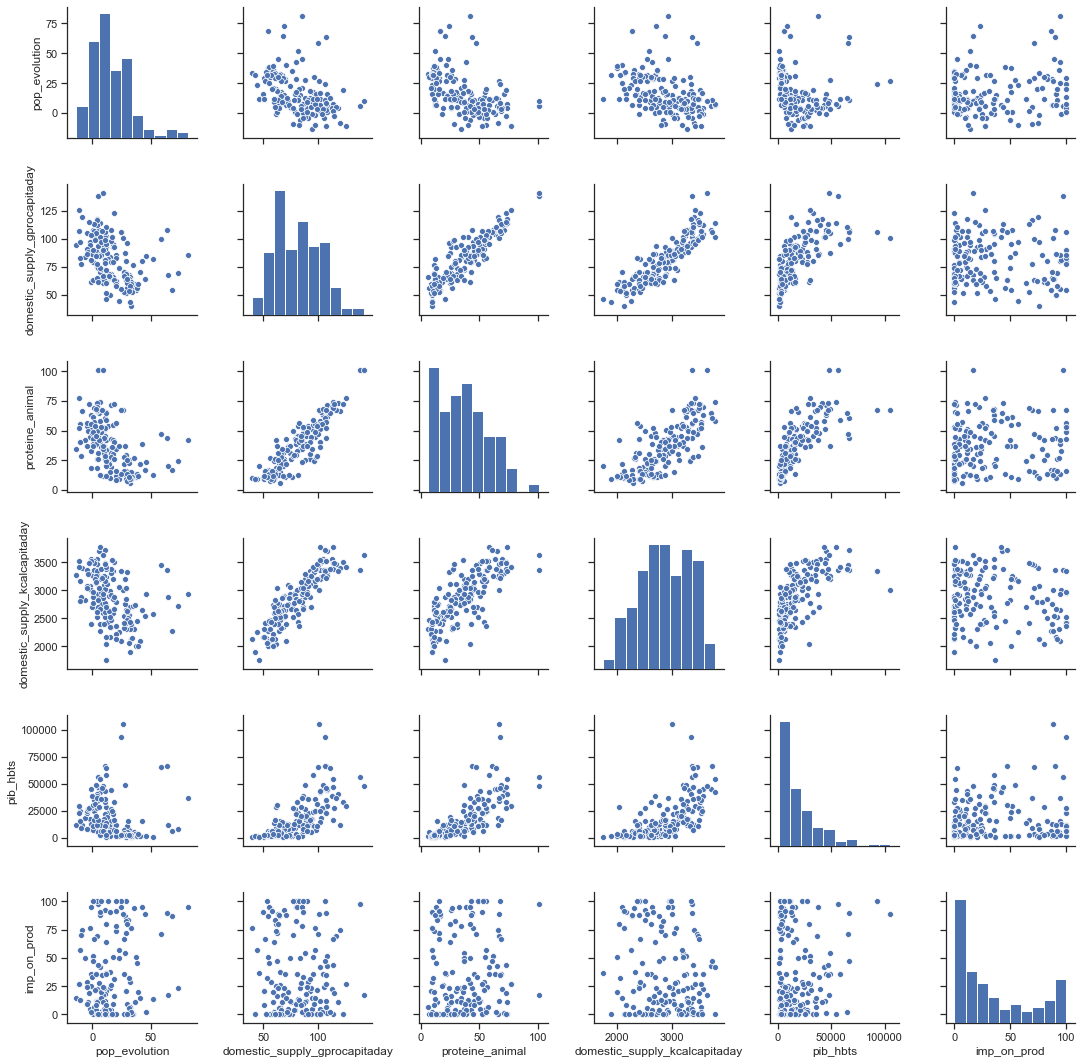

In [4]:
nuages=sns.pairplot(coq.drop(columns="country"))
plt.show()

### I.3. Matrice des corrélations

On analyse maintenant la matrice colorée des corrélations du DataFrame "coq".

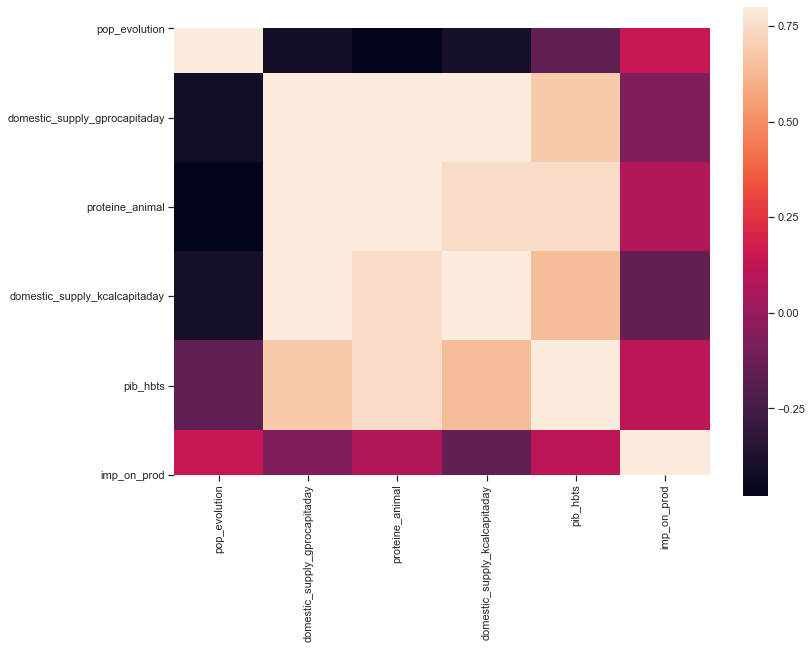

In [5]:
coq_mat = coq.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(coq_mat, vmax=.8, square=True)
plt.show()

___Observations:___
- D'après le tableau de contingence coloré ci-dessus, on peut estimer une corrélation très forte entre la disponibilité intérieure en protéines de chaque pays, celle en kcalories, la proportion de protéines animales par rapport à la quantité totale de protéines et le PIB par habitant. On peut fortement supposer que les pays les plus consommateurs de viande sont donc les pays les plus riches.
- On distingue une corrélation faible entre l'évolution de la population et le taux d'importation par rapport à la production locale de viande de volaille. Dans un pays donné, on peut suggérer que plus la variation de la population est importante, plus ce pays en question est susceptible d'être enclin à de nouvelles importations.

------------
------------

# II. Clustering

## II.1. Données centrées-réduites

Tout d'abord, appliquons à chaque variable de "coq" la formule de centrage-réduction, afin que la moyenne de chaque colonne vale 0, et l'écart-type vale 1, et appelons "poussin" le tableau centré-réduit.

In [6]:
poussin=coq.set_index("country")

X=poussin.values
std_scaler = preprocessing.StandardScaler().fit(X)
X_scaled = std_scaler.transform(X)

poussin=pd.DataFrame(X_scaled,
                  index=poussin.index,
                  columns=poussin.columns)

poussin.head(5)

,pop_evolution,domestic_supply_gprocapitaday,proteine_animal,domestic_supply_kcalcapitaday,pib_hbts,imp_on_prod
country,,,,,,
Afghanistan,1.281658,-1.332677,-1.289068,-1.910117,-0.896138,0.479290
Afrique du Sud,-0.072259,0.095803,-0.118552,0.279958,-0.331413,-0.316944
Albanie,-1.486100,1.856557,1.430761,1.174496,-0.354601,1.168307
Algérie,0.105732,0.558647,-0.550000,1.062128,-0.242841,-0.983003
Allemagne,-1.023324,1.108699,1.271832,1.518210,1.460014,0.037916


## II.2. Classification hiérarchique: dendrogramme

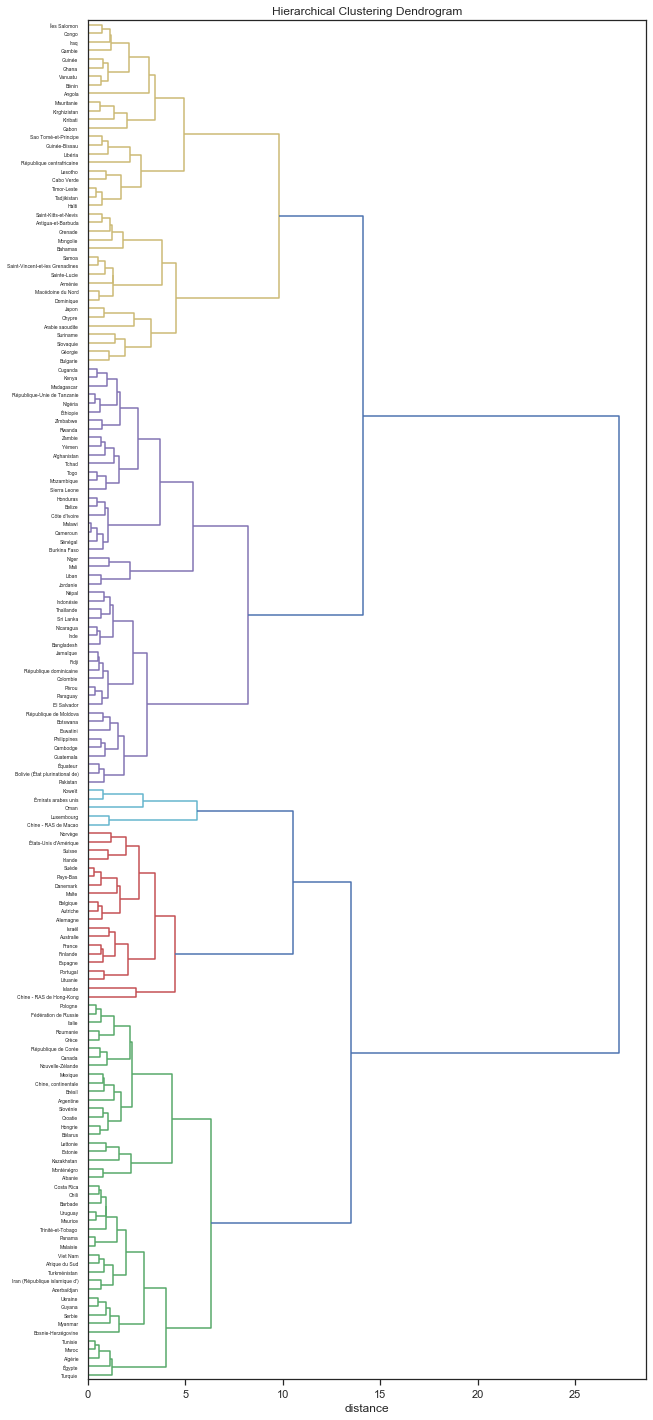

In [7]:
#Préparation des données pour le clustering:
X = poussin.values
names = poussin.index

#Clustering hiérarchique:
Z = linkage(X, 'ward')

plot_dendrogram(Z, names)
plt.show()

In [8]:
#Nous découpons ici le dendrogramme en 5 clusters afin d'associer chaque pays à un groupe, variable que nous ajoutons à "coq":
clusters = fcluster(Z, 5, criterion='maxclust')
coq["cluster"]=clusters

coq.head(3)

,country,pop_evolution,domestic_supply_gprocapitaday,proteine_animal,domestic_supply_kcalcapitaday,pib_hbts,imp_on_prod,cluster
country_code,,,,,,,,
AFG,Afghanistan,37.75,54.09,10.55,2000,1758.5,50.877193,4
ZAF,Afrique du Sud,14.93,83.41,34.56,2994,12233.4,23.567171,1
ALB,Albanie,-8.90,119.55,66.34,3400,11803.3,74.509804,1


In [9]:
#On enregistre le fichier CSV contenant chaque pays muni du cluster auquel il a été attribué:
df=coq.set_index("country")
df=df.iloc[:, [6]]

df.head(5)

,cluster
country,
Afghanistan,4
Afrique du Sud,1
Albanie,1
Algérie,1
Allemagne,2


## II.3. Algorithme des k-means

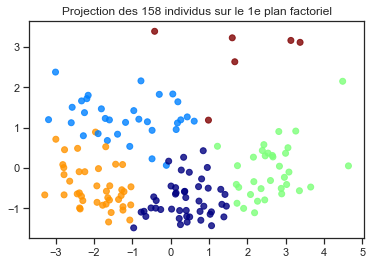

In [10]:
#Affichage du clustering par projection des individus sur le premier plan factoriel:

n_clust = 5
X = poussin.values

km = KMeans(n_clusters=n_clust)
km.fit(X)
clusters2 = km.labels_

pca = decomposition.PCA(n_components=5).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters2.astype(np.float), cmap = 'jet', alpha=.8)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

#### Nous avons vu en introduction que nous allions cibler les pays présentant les plus hauts résultats pour chacune des variables étudiées. Pour cibler un nombre raisonnable de pays, cette projection nous indique qu'on pourra cibler deux clusters en premier lieux, ceux dont les pays se situent le plus à droite selon l'axe des abscisses du 1er plan factoriel ci-dessus.

## II.4. Calcul des centroïdes et classification des groupes de pays obtenus

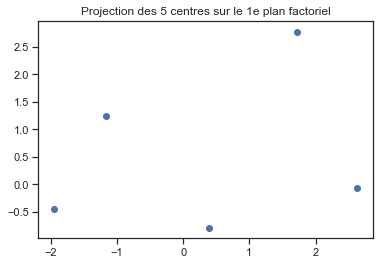

In [11]:
#Affichage des positions des centres de classes sur le plan factoriel:

plt.figure()
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

#### En contrastant la projection des centroïdes à la projection précédente, celle-là nous confirme que 2 groupes de pays semblent être un meilleur choix pour nos importations. Nous allons développer cette théorie lors du partitionnement ci-dessous.

In [12]:
#Affichage des centroïdes des groupes et de leurs coordonnées dans chacune des dimensions:

coq1=coq.drop(columns="country")
clust = pd.DataFrame(coq1.groupby("cluster").mean())

clust.to_csv("data/projet_5/livrables_p5/p05_04_centroides.csv")

clust

,pop_evolution,domestic_supply_gprocapitaday,proteine_animal,domestic_supply_kcalcapitaday,pib_hbts,imp_on_prod
cluster,,,,,,
1,5.850000,94.500909,45.548864,3190.090909,20075.968182,16.376141
2,6.194000,113.345500,71.239500,3474.550000,45571.015000,29.794440
3,50.920000,99.766000,53.586000,3216.000000,73712.800000,88.840725
4,24.601224,64.825918,19.172041,2523.346939,5902.736735,10.846964
5,17.750750,69.196000,30.210000,2584.925000,11289.627500,78.726682


## II.5. Description et  critique des cinq clusters à partir des résultats obtenus

• GROUPE 1: Ce sont des pays productifs, relativement peuplés mais où l'évolution de la population n'y est pas très forte, tels que la Chine Continentale ou encore le Brésil, au potentiel commercial intéressant. La disponibilité alimentaire par habitant y est importante mais l'importation de volaille par rapport à la production y est faible. Beaucoup de ces pays ont une économie mal répartie (Chine, Brésil, Russie...). En conclusion, ces pays ne paraissent pas propices à notre projet. Malgré un bon pourcentage de protéine animale dans leur disponibilité alimentaire en protéine, les conditions économiques et productives de ces pays ne joueront probablement pas en faveur d'une exportation de viande de volaille rentable et prospère. Nous verrons par la suite que le groupe 1 devra être considérer après les groupes 2 et 3 mais avant les groupes 4 et 5 pour nos premières exportations.

• GROUPE 2: Ce sont des pays parmi les plus riches du monde. On y trouve en grande majorité des pays européens (dont la France, l'Allemagne et la Belgique), ainsi que quelques autres pays au potentiel commercial très important comme les États-Unis ou encore la Chine de Hong-Kong. Ce sont globalement les pays ayant d'ores et déjà de nombreux échanges commerciaux avec la France. Les pays du groupe 2 sont ceux ayant les plus faibles augmentations démographiques mais ayant la plus grande disponibilité alimentaire (que ce soit en protéines ou en kcalories) par habitant et surtout où la consommation animale est la plus importante. La proximité des pays européens avec la France est un critère idéal à la potentielle exportation de notre marchandise, la plupart d'entre eux faisant d'ailleurs partie de l'Union Européenne, les conditions de libre-échange sont très intéressantes pour nous. En revanche, ces pays semblent plus penchés sur la  production locale que sur l'importation de viande de volaille et on constate un renouvellement de la clientèle assez  faible en dépit d'une croissance de population médiocre depuis 2007. Cependant, les conditions de choix de pays-cibles définies en introduction demeurent globalement présents. Si l'on écarte le renouvellement de la clientèle et les tendances protectionnistes sur notre marché de ces pays-là, ils constituent visiblement un groupe à cibler pour nos premières exportations à l'étranger.

• GROUPE 3: C'est un petit groupe de 5 pays: les Émirats, le Koweït, le Luxembourg, l'Oman et la Chine de Macao. Ce sont des pays à petite superficie, mais avec un PIB très important, le nombre d'habitants de chacun de ces pays  est relativement faible mais en plein essort depuis 2007, ce qui indique que la clientèle ne cesserait de s'y renouveler en cas d'importation de nos produits. Ces pays semblent plus axés sur l'importation que sur la production locale de la viande de volaille, et le pourcentage de protéine animale oscille autour de 50%. Finalement, ce groupe de pays présentent globalement toutes les caractéristiques définies en introduction pour être choisis comme les premiers pays-cibles. Malheureusement, nous devrons tenir compte de l'importante distance entre la France et ces pays (hormis le Luxembourg), ce qui nous invitera plus tard, après une analyse plus approfondie à reconsidérer ce groupe de pays.

• GROUPE 4: On y trouvera, entre autres, une grande partie de l'Afrique Subsaharienne, ainsi que plusieurs pays d'Asie Centrale. On y trouve  les pays où la disponibilité intérieure, le PIB par habitant et l'importation de viande de volaille sont faibles. Les conditions pour ne pas cibler ces pays sont donc réunies, et on pourra écarter le groupe 4 de nos pays-cibles. 

• GROUPE 5: On y trouvera, entre autres, une grande partie de l'Afrique Subsaharienne, ainsi que plusieurs pays du Moyen-Orient, et quelques pays océaniques à faible superficie. On y trouve les critères similaires à ceux du groupe 4, excepté la question d'ouverture à l'importation de viande de volaille. En effet, les pays du groupe 5 disposent d'un taux d'importation de viande de  volaille est presque aussi significatif que celui du groupe 3, donc le marché de la volaille nous y est ouvert, mais les conditions économiques persistent à nous dispenser de ces pays pour nos premières exportations. Néanmoins, en cas d'épuisement des pays des 3 premiers groupes, il sera préférable de cibler les pays du groupe 5 plutôt que ceux du groupe 4.

## II.6. Bilan  provisoire

Pour nos premières exportations de viande de poulet à l'étranger, nous devrions cibler les pays des groupes 2 et 3: on devrait se concentrer en priorité sur les pays du groupe 3, puis analyser plus en profondeur les pays du groupe 2 susceptibles de faire prospérer notre marché. Ce sont clairement les deux groupes de pays identifiés précédemment sur le plan factoriel par l'algorithme des K-means. Ces deux groupes présentent globalement de meilleurs résultats que les autres sur l'ensemble de nos six variables. Les perspectives économiques et productives des pays des trois autres groupes (1, 4 et 5) ne semblent pas réunir les critères nécessaires à l'essort de notre commerce. Ces pays doivent donc, en premier lieu, être écartés de nos projets, puis éventuellement analyser à nouveau en cas d'épuisement du potentiel des groupes 2 et 3. Avant l'analyse en composantes principales, nous pouvons émettre une première courte liste provisoire des pays à cibler pour nos exportations, à savoir les quatre pays du groupe 3:
- Les Émirats-Arabes-Unis
- Le Koweït 
- Le Luxembourg
- L'Oman
- La Chine de Macao

# <center>_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _</center>

# III. Analyse en composantes principales (ACP)

##  III.1. Choix du nombre  de  composantes et éboulis des valeurs propres

In [13]:
#On reprend donc notre DataFrame de base, centré-réduit puis avec ajout de la colonne cluster, que nous appellerons "bec" où 
#nous y appliquerons l'ACP:

bec=poussin.copy()
clusters = fcluster(Z, 5, criterion='maxclust')
bec["cluster"]=clusters
bec.head(4)

,pop_evolution,domestic_supply_gprocapitaday,proteine_animal,domestic_supply_kcalcapitaday,pib_hbts,imp_on_prod,cluster
country,,,,,,,
Afghanistan,1.281658,-1.332677,-1.289068,-1.910117,-0.896138,0.479290,4
Afrique du Sud,-0.072259,0.095803,-0.118552,0.279958,-0.331413,-0.316944,1
Albanie,-1.486100,1.856557,1.430761,1.174496,-0.354601,1.168307,1
Algérie,0.105732,0.558647,-0.550000,1.062128,-0.242841,-0.983003,1


In [14]:
#Après avoir réalisé une première ACP avec 6 composantes en amont, nous avons constaté que les composantes de 3 à 6 incluses  
#représentaient qu'un faible pourcentage de l'inertie totale de nos variables, c'est pourquoi nous ne nous intéresserons qu'aux
#deux premières composantes de l'ACP que nous nommerons "F1" et "F2":

n_comp=2
data = bec.copy()

#Sélection des colonnes à prendre en compte dans l'ACP
data_pca = data[["pop_evolution", "domestic_supply_gprocapitaday",
                 "proteine_animal", "domestic_supply_kcalcapitaday", "imp_on_prod", "pib_hbts"]]

#Préparation des données pour l'ACP, la table "bec" étant déjà centrée-réduite, nous éviterons de le faire à nouveau:
data_pca = data_pca.fillna(data_pca.mean())
X = data_pca.values
names = data.index
features = data.columns
X_scaled = X

#Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

#Présentons les deux nouvelles variables créées dans le tableau appelé "composantes":
composantes=pd.DataFrame(pca.fit_transform(X_scaled), index=bec.index)
composantes.columns=["F1", "F2"]
composantes.head(4)

,F1,F2
country,,
Afghanistan,-2.992876,0.712887
Afrique du Sud,0.010498,-0.444787
Albanie,2.466325,0.301645
Algérie,0.407084,-1.048713


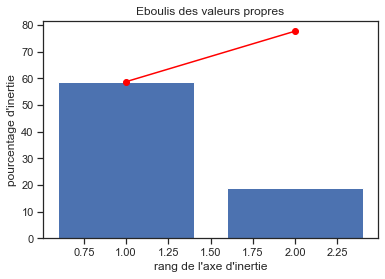

In [15]:
#Eboulis des valeurs propres
display_scree_plot(pca)

Les variables F1 et F2 représentent respectivement 58,7% et 19% de l'inertie totale, pour un nombre de 6 variables. Une  variable de base ne représentant 100/6≈16,7% de l'inertie totale, nous pouvons considérer comme importantes la variable  F2, et surtout la variable F1.

## III.2. Cercle des corrélations

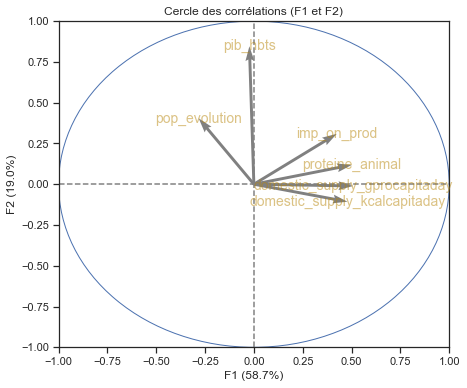

In [16]:
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

#### La composante F1 représente 60,4% de  l'inertie totale et semble regrouper les variables:
- domestic_supply_kcalcapitaday (disponibilité intérieure en kcalories)
- domestic_supply_gprocatidaday (disponibilité intérieure en gramme de protéines)
- proteine_animal (le pourcentage de protéines animales dans la disponibilité intérieure en protéine)
- imp_on_prod (le ratio d'importation de viande de volaille sur sa production locale)
- pop_evolution (l'évolution de la population depuis 2007) celle-ci, corrélée négativement par rapport aux quatre précédentes.

#### On pourrait donc qualifier F1 comme un indice de clientèle potentielle: où plus cette variable est élevée, plus le pays en question est doué d'une forte disponibilité intérieure avec une production et un taux d'importation actifs de la viande de volaille, mais où le renouvellement de la clientèle n'est peut-être pas très potentiel. En revanche, F2 nous indiquera quels sont les pays à fort potentiel économique (PIB par habitant) et où le renouvellement de la clientèle (pop_evolution) est plus probable. Un pays présentant un résultat élevé pour  F1 et F2 est alors un pays parfaitement envisageable pour notre importation, car il présentera toutes les caractéristiques conséquentes à un nouveau marché.

## III.3. Projetction des individus sur le premier plan factoriel

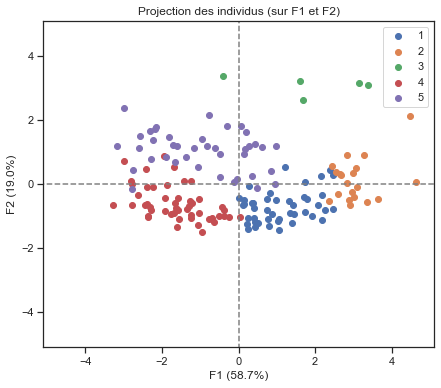

In [18]:
#Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = bec["cluster"])
plt.show()

####  Les pays les plus intéressants à cibler, si l'on en croit les  résultats de l'ACP, sont ceux situés en priorité positivement selon l'axe des abscisses (car variable plus forte) et présentant comme caractéristique secondaire  positivement selon l'axe des ordonnées. On y retrouve alors bien principalement les pays  des groupes 2 et 3, qualifiés lors du clustering comme les pays à cibler en priorité. On reconnaît notamment en jaune les 5 pays du groupes 3, tous les 5 disposants des ressources économiques et productives prospères à notre implantation, ainsi que les pays du groupe 3 (en vert), qui présentent les plus hautes données pour la variable F1. On pourra sélectionner les pays à cibler dans le groupe 2 selon leur position relative à F2. Nous ferons cette  sélection  juste  après les tests statistiques qui suivent pour affirmer que nos clusters diffèrent bien.

# <center>_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _</center>

# IV. Tests Statistiques

## IV.1. Test de normalité des variables: Shapiro

On se fixera une marge de  1%, que ce soit dans l'hypothèse où l'on considère qu'une variable suit une loi normale, ou bien dans l'hypothèse où l'on rejette l'idée qu'une variable n'est pas gaussienne.

In [19]:
#Rerenons le DataFrame "coq", et effectuons le test de Shapiro sur chacune de ces variables afin de repérer lesquelles suivent
#une loi normale au seuil de 1%:
coq.head(4)

,country,pop_evolution,domestic_supply_gprocapitaday,proteine_animal,domestic_supply_kcalcapitaday,pib_hbts,imp_on_prod,cluster
country_code,,,,,,,,
AFG,Afghanistan,37.75,54.09,10.55,2000,1758.5,50.877193,4
ZAF,Afrique du Sud,14.93,83.41,34.56,2994,12233.4,23.567171,1
ALB,Albanie,-8.90,119.55,66.34,3400,11803.3,74.509804,1
DZA,Algérie,17.93,92.91,25.71,3349,13876.3,0.722022,1


Pour chaque variable X de coq, on pose l'hypothèse nulle H0(X): "La variable X suit une loi normale de moyenne mean(X) et de variance Var(X)". Le test de Shapiro ci-dessous nous indiquera si l'on peut rejeter cette hypothèse pour un niveau de test de 5%.

In [20]:
#On effectue le test de Shapiro sur chaque variable de coq où l'on compare la "proximité" entre la variable de coq en question, 
#et la loi normale dont les paramètres sont la moyenne et la variance de cette variable:

print("________________________________________________________________________________") #Juste pour faire joli...

shapi=coq.drop(columns=["country", "cluster"])

for X in shapi:
    ech=st.shapiro(shapi[X]) #On arrondira les valeurs du test pour une meilleure visibilité.
    print(X, "--->", "statistique de test:", round(ech[0], 3), "and", "pvalue=", round(ech[1], 3))
    print("________________________________________________________________________________")

________________________________________________________________________________
pop_evolution ---> statistique de test: 0.924 and pvalue= 0.0
________________________________________________________________________________
domestic_supply_gprocapitaday ---> statistique de test: 0.978 and pvalue= 0.012
________________________________________________________________________________
proteine_animal ---> statistique de test: 0.953 and pvalue= 0.0
________________________________________________________________________________
domestic_supply_kcalcapitaday ---> statistique de test: 0.982 and pvalue= 0.036
________________________________________________________________________________
pib_hbts ---> statistique de test: 0.82 and pvalue= 0.0
________________________________________________________________________________
imp_on_prod ---> statistique de test: 0.847 and pvalue= 0.0
________________________________________________________________________________


Ainsi, selon le test de Shapiro, la pvalue observée pour la variable "domestic_supply_kcalcapitaday" représentant la disponibilité intérieure par habitant en kilo-calories est d'environ 0,036. Donc pour cette variable, pvalue>0,01 ce qui signifie qu'on ne peut pas rejeter H0 à un niveau de  test de  1%. Nous pouvons donc considérer "domestic_supply_kcalcapitaday" comme suivant une loi gaussienne, et nous la choisirons pour effectuer un test de comparaison entre les groupes 2 et 5 issus de notre clustering.

## IV.2. Test de comparaison

Nous allons maintenant réaliser un test statistique afin de vérifier si la moyenne et la variance des groupes 2 et 5 diffèrent respectivement et de façon significative, avec un niveau de test de 1%, sur la variable "domestic_supply_kcalcapitaday". 

Soient μ2 et μ5, respectivement les moyennes du groupe 2 et du groupe 5 sur la variable "domestic_supply_kcalcapitaday", et soient σ2² et σ5², respectivement les variances du groupe 2 et du groupe 5 sur la variable "domestic_supply_kcalcapitaday".

Formulons les hypothèses suivantes sur les moyennes:
- Hypothèse nulle       H0: μ2=μ5
- Hypothèse alternative H1: μ2≠μ5

Formulons les hypothèses suivantes sur les variances:
- Hypothèse nulle       K0: σ2²=σ5²
- Hypothèse alternative K1: σ2²≠σ5²

In [21]:
g2=coq[coq["cluster"]==2]["domestic_supply_kcalcapitaday"]
g5=coq[coq["cluster"]==5]["domestic_supply_kcalcapitaday"]

comparaison_variances=st.bartlett(g2, g5)
print("Test de comparaison des variances:")
print("statistc =", round(comparaison_variances[0], 2))
print("pvalue =", round(comparaison_variances[1], 3))

print("______________________________")
print("______________________________")

comparaison_moyennes=st.ttest_ind(g2, g5, equal_var=True)
print("Test de comparaison des moyennes:")
print("statistc =", round(comparaison_moyennes[0], 2))
print("pvalue =", round(comparaison_moyennes[1], 3))

Test de comparaison des variances:
statistc = 9.24
pvalue = 0.002
______________________________
______________________________
Test de comparaison des moyennes:
statistc = 11.15
pvalue = 0.0


Nous observons, avec une pvalue inférieure à 0,01  des deux tests de comparaisons, que l'on peut rejeter sereinement H0 et K0 pour un test statistique de niveau 1%, et par conséquent, admettre H1 et K1 qui indiquent respectivement que les  moyennes et les variances diffèrent significativement. On en déduit  que nos deux clusters diffèrent réellement. Une série de tests analogues aux résultats simillaires effectués en amont sur l'ensemble des groupes issus du clustering deux à deux nous permettent de conclure que nos cinq clusters diffèrent réellement deux à deux.

# <center>_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _</center>


# V. Conclusion: Où s'implanter?

####  Nous allons maintenant construire progressivement la table "cibles" qui nous renverra la liste des 8 pays les plus propices à une insertion dans le marché du poulet selon nos données, ordonnée selon les perspectives  les plus avantageuses. Pour cela, nous  allons repartir de l'ensemble des pays, et  "éliminer" progressivement  ceux qui ne nous intéresserons pas dans un premier  temps.

In [48]:
#Partons donc des 158 pays étudiés, et ajoutons les variables F1 et  F2 obtenus lors de l'ACP:
cibles=coq.copy()
cibles=cibles.set_index('country')
cibles["F1"]=composantes["F1"]
cibles["F2"]=composantes["F2"]
cibles

,pop_evolution,domestic_supply_gprocapitaday,proteine_animal,domestic_supply_kcalcapitaday,pib_hbts,imp_on_prod,cluster,F1,F2
country,,,,,,,,,
Afghanistan,37.75,54.09,10.55,2000,1758.5,50.877193,4,-2.992876,0.712887
Afrique du Sud,14.93,83.41,34.56,2994,12233.4,23.567171,1,0.010498,-0.444787
Albanie,-8.90,119.55,66.34,3400,11803.3,74.509804,1,2.466325,0.301645
Algérie,17.93,92.91,25.71,3349,13876.3,0.722022,1,0.407084,-1.048713
Allemagne,-1.10,104.20,63.08,3556,45462.0,35.738540,2,2.837008,0.045671
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.78,63.73,25.33,2623,2827.1,80.000000,5,-1.596347,1.191022
Viet Nam,9.30,90.03,36.81,2938,6233.5,24.069479,1,0.126966,-0.644626
Yémen,31.41,53.23,10.66,2063,2404.4,31.707317,4,-2.810982,0.085073


Suite au clustering de la partie II, nous avons estimé que les groupes de pays à viser en priorités étaient les groupes 2 et 3. En introduction, nous avons bien indiqué que nous ciblerions les pays représentant  globalement les plus hautes valeurs pour chacune de nos six variables de base. Lors de l'ACP, nous avons estimé deux variables synthétiques F1 et F2 représentant en somme presque 80% de l'inertie totale. Nous avons ensuite observé que les groupes 2 et 3 représentaient bel et bien les plus hautes valeurs pour F1 et F2. 

In [49]:
#Nous pouvons donc retirer l'ensemble des pays des groupes 1, 4 et 5 de notre liste:
cibles=cibles[cibles["cluster"].isin([1, 4, 5])==False]
#Notre liste se réduit donc déjà aux 25 pays des groupes 1 et 2:
cibles[["cluster"]]

,cluster
country,
Allemagne,2
Australie,2
Autriche,2
Belgique,2
Chine - RAS de Hong-Kong,2
Chine - RAS de Macao,3
Danemark,2
Émirats arabes unis,3
Espagne,2


Sur le premier plan factoriel obtenu par ACP, nous constatons qu'un pays du groupe 2 comprend une valeur négative pour F1, qui rappelons-le représente presque 80% de l'inertie totale, malgré son appartenance à la liste provisoire donnée à la fin de la partie II, nous l'éléminerons immédiatement de la liste. Afin de tenir compte du renouvellement de la clientèle et du PIB par habitant, nous supprimerons parmi les pays restant ceux situés négativement selon F2. En clair, nous ne gardons que les pays des groupes 2 et 3 situés en haut à droite du premier plan factoriel obtenu par ACP. 

In [50]:
cibles=cibles[cibles["F1"]>0]
cibles=cibles[cibles["F2"]>0]

#Nous obtenons ainsi la liste des 15 pays à cibler en priorité:
cibles[["cluster"]]

,cluster
country,
Allemagne,2
Autriche,2
Belgique,2
Chine - RAS de Hong-Kong,2
Chine - RAS de Macao,3
Danemark,2
Émirats arabes unis,3
Irlande,2
Islande,2


Pour départager les pays restants, créons la varialbe "inertie_acp" qui nous renvoie la combinaisons linéaire des variables  F1 et F2  associés à leur pourcentage d'inertie  respectif, et réordonnons la liste par ordre décroissant selon cette nouvelle variable, et ne conserverons que les 10 pays en tête comme la liste.

In [51]:
cibles["inertie_acp"]=0.604*cibles.F1+0.178*cibles.F2
cibles=cibles.sort_values(by="inertie_acp", ascending=False)
cibles=cibles.iloc[:, [6]].head(10)

#Nous obtenons maintenant la liste des 10 pays à cibler en priorité:
cibles[["cluster"]]

,cluster
country,
Chine - RAS de Hong-Kong,2
Islande,2
Luxembourg,3
Chine - RAS de Macao,3
Irlande,2
Danemark,2
Autriche,2
Malte,2
Allemagne,2


#### On repère donc 10 pays européens, hormi la Chine de Hong-Kong et la Chine de Macao. Si l'on tient maintenant compte des conditions de libre-échanges établies entre la France et les autres pays d'Europes, il est préférable d'écarter dans un premier temps les deux territoires chinois citées précédemment au détriment des 8 pays européens en question de cette liste. Nous pourrons néanmoins les considérer à nouveau après nous être étendus en Europe. Nous obtenons ainsi finalement la liste des 8 pays que nous présenterons comme les premiers pays-cibles pour nos premières exportations à l'étranger.

In [46]:
cibles=cibles.reset_index()
cibles=cibles.loc[(cibles.country!="Chine - RAS de Hong-Kong") 
                  & (cibles.country!="Chine - RAS de Macao")]

cibles=cibles.set_index("country")
cibles.to_csv("data/projet_5/livrables_p5/p5_06_pays_cibles.csv")

#Et voici notre liste finale:
cibles

,cluster
country,
Islande,2
Luxembourg,3
Irlande,2
Danemark,2
Autriche,2
Malte,2
Allemagne,2
Belgique,2


### Nous avons maintenant la liste des 8 pays à viser pour nos premières importations de viande de poulet à l'étranger. Notons que nous n'avons gardé que le Luxembourg de liste provisoire établie à la partie II, en vertue de l'analyse qui a suivi. Nous pourrons aussi observer dans les tableaux précédents les potentiels pays à cibler en deuxième choix après les 8 établis, tels que la Chine ou les États-Unis.